<a href="https://colab.research.google.com/github/laugustovieira/BootCamp-Data-Science/blob/main/Desafios_Modulo1_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 5

#Importar Bibliotecas

In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Carregar informações

In [26]:
dados = pd.read_csv("/content/drive/MyDrive/Dados_BootCamp/A005117189_28_143_208_2021_ATENDIMENTO.csv", encoding="ISO-8859-1",
            sep=";", skiprows = 3, skipfooter = 12, engine = "python", thousands = ",", decimal = ".")

#Tratar Dados

In [27]:
pd.options.display.float_format = "{:.2f}".format


#Desafio 01 - Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.




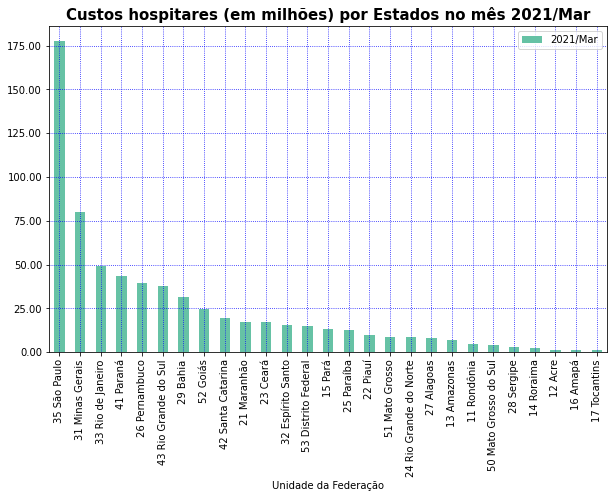

In [46]:
font = {'weight' : 'bold',
        'size'   : 15,
        'Color' : 'black'}

colunas_usaveis_def3 = dados.mean().index.tolist()
colunas_usaveis_def3.insert(0,"Unidade da Federação")

usaveis_def3 = dados[colunas_usaveis_def3]
usaveis_def3= usaveis_def3.drop("Total", axis=1)
usaveis_def3 = usaveis_def3.set_index("Unidade da Federação")
usaveis_ordenado = usaveis_def3.sort_values(by="Unidade da Federação", ascending=False)

coluna_cinco_estados = usaveis_ordenado.columns[-1]
usaveis_ordenado = usaveis_ordenado[coluna_cinco_estados]

usaveis_ordenado = usaveis_ordenado.sort_values(ascending =False)
usaveis_ordenado = usaveis_ordenado/ 100000000
ax = usaveis_ordenado.T.plot(kind="bar",figsize=(10,6))
ax.grid(axis='both',linestyle='dotted', color='b')
plt.legend(bbox_to_anchor=(1,1))
sns.set_palette(sns.color_palette("Set2", 27))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.title("Custos hospitares (em milhões) por Estados no mês " + coluna_cinco_estados, fontdict=font)
plt.rc("xtick", labelsize=10)
plt.show()

# Desafio 02 - Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

(0.0, 2.5)

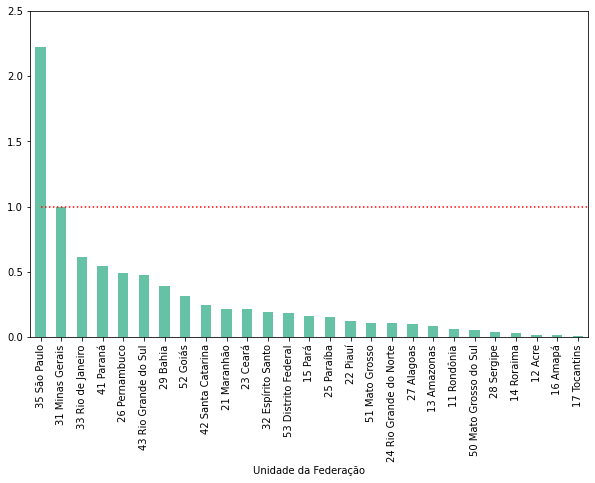

In [29]:
usaveis_meu_estado = usaveis_ordenado / usaveis_ordenado["31 Minas Gerais"]
ax = usaveis_meu_estado.plot(figsize=(10,6), kind="bar")
#ax.grid(axis="both", linestyle="dotted", color='blue')
plt.hlines(y=1, xmin=0, xmax=27,
           colors="red", label= "Linha Base", linestyles='dotted')

plt.ylim(0,2.5)


Acima temos os custos hospistalares dos Estados Brasileiros em relação a "Minas Gerais". A linha vermelha representa Minas Gerais. São Paulo foi o estado que teve o custo duas vezes que Minas Gerais. Todos os outros estados tem os custos menores que Minas.

In [30]:
usaveis_meu_estado = usaveis_ordenado / usaveis_ordenado["31 Minas Gerais"]
usaveis_meu_estado

Unidade da Federação
35 São Paulo             2.22
31 Minas Gerais          1.00
33 Rio de Janeiro        0.62
41 Paraná                0.55
26 Pernambuco            0.49
43 Rio Grande do Sul     0.47
29 Bahia                 0.39
52 Goiás                 0.31
42 Santa Catarina        0.24
21 Maranhão              0.22
23 Ceará                 0.22
32 Espírito Santo        0.20
53 Distrito Federal      0.18
15 Pará                  0.16
25 Paraíba               0.16
22 Piauí                 0.12
51 Mato Grosso           0.11
24 Rio Grande do Norte   0.11
27 Alagoas               0.10
13 Amazonas              0.09
11 Rondônia              0.06
50 Mato Grosso do Sul    0.05
28 Sergipe               0.04
14 Roraima               0.03
12 Acre                  0.01
16 Amapá                 0.01
17 Tocantins             0.01
Name: 2021/Mar, dtype: float64

Acima a tabela da relação dos gastos dos Estados em relação a Minas Gerais.

#Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Segundo IBGE o Estado de Minas Gerais tem uma estimativa de 21.292.666 habitantes
 https://cidades.ibge.gov.br/brasil/sp/panorama

Segundo IBGE o Estado de São Paulo tem uma estimativa de  46.289.333 habitantes
 https://cidades.ibge.gov.br/brasil/sp/panorama

In [45]:
usaveis_ordenado*1000000

Unidade da Federação
35 São Paulo             177408317.71
31 Minas Gerais           79780838.00
33 Rio de Janeiro         49149884.48
41 Paraná                 43480729.07
26 Pernambuco             39472738.81
43 Rio Grande do Sul      37798832.80
29 Bahia                  31314602.44
52 Goiás                  24867001.02
42 Santa Catarina         19375822.56
21 Maranhão               17294509.11
23 Ceará                  17173151.55
32 Espírito Santo         15606368.11
53 Distrito Federal       14731938.43
15 Pará                   13069564.31
25 Paraíba                12517894.05
22 Piauí                   9542151.53
51 Mato Grosso             8835890.09
24 Rio Grande do Norte     8733455.36
27 Alagoas                 8180887.21
13 Amazonas                6799060.80
11 Rondônia                4732441.04
50 Mato Grosso do Sul      4035989.77
28 Sergipe                 3081081.42
14 Roraima                 2381844.31
12 Acre                    1137341.65
16 Amapá                    9

In [58]:
numero_habitantes_minas_gerais =  21292666
numero_habitantes_sao_paulo = 46289333
usaveis_populacao = usaveis_ordenado * 1000000

custo_por_individuo_sp = usaveis_populacao["35 São Paulo"] / numero_habitantes_sao_paulo
custo_por_individuo_mg = usaveis_populacao["31 Minas Gerais"] / numero_habitantes_minas_gerais

dados_interesse = pd.DataFrame( data = [custo_por_individuo_mg, custo_por_individuo_sp], index = ["31 Minas Gerais","35 São Paulo"])
#usaveis_populacao = usaveis_populacao.loc[["35 São Paulo","31 Minas Gerais"]]
#usaveis_populacao = usaveis_populacao / [numero_habitantes_minas_gerais,numero_habitantes_sao_paulo]  
dados_interesse

,0
31 Minas Gerais,3.75
35 São Paulo,3.83


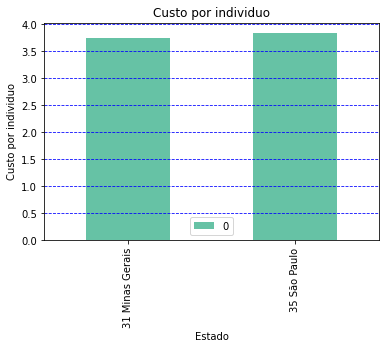

In [78]:
dados_interesse.plot(kind="bar")
ax = plt.grid(axis = "y", linestyle = "--", color = "blue")
plt.title("Custo por individuo")
plt.ylabel("Custo por individuo", fontsize = 10)
plt.xlabel("Estado")
plt.show()

Os gastos em março de 2021 por individuo no estado de São Paulo e Minas Gerais são praticamente os mesmos.

#Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Será que todos os estados tem aproximadamente o mesmo custo por indivíduo?
Faria sentido analisar o custo pelo número de pessoas atendidas?


#Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

As análises foram reproduzidas nos desafios acima.
Realizar análises em outros meses comparando o custo individual com mais estados, verificando assim, se existe alguma descrepancia ns valores.